<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#F5DEB3;
           font-size:170%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          text-align: center;
          font-size:150%;
          color:blue;">
          ▶️🛝Playground S03E08▶️🛝
            
</p>
<style>
        h1{text-align: center;}
</style>  
    
</div>

<p style="font-family:cursive; font-size:15px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing ,Thank you!</p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>
<p style="width:270px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
</p>


In [14]:
!wget http://bit.ly/3ZLyF82 -O CSS.css -q
    
from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Importing the required Liabraries
</p>

In [15]:
#Data manipulation imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import math

import warnings
warnings.filterwarnings('ignore')
#Data Visualization imports
tqdm.pandas()

rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL
#Modeling imports
import xgboost as xgb
from xgboost.callback import EarlyStopping
from sklearn import model_selection
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error

<p align="right">
  <img src="https://drive.google.com/uc?export=view&id=1sFLl4_hs33s1S66S8rrl27UUqahScH6I"/>
</p>

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Introduction
</p>

This Kaggle notebook is aimed at providing a comprehensive exploratory data analysis (EDA) for the given dataset, with the ultimate goal of making informed decisions and recommendations before diving into modeling. 
>Through this EDA, we will gain a deeper understanding of the data structure, missing values, relationships between variables, and any patterns or anomalies that could impact our modeling process. By performing a thorough EDA, we can identify potential roadblocks and make necessary pre-processing decisions that will improve the performance and accuracy of our models. So, buckle up, and let's embark on this journey of discovering insights and valuable information from the data to drive better modeling decisions.


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    About the Data
</p>

**The dataset** for this competition (both train and test) was generated from a deep learning model trained on the [Gemstone Price Prediction dataset](https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction). The goal is to predict `price`  the Price of the cubic zirconia.
 
There are 18 independent variables (including `id`):

* `Carat`: a weight of the cubic zirconia. A metric “carat” is defined as 200 milligrams.
* `Cut`:  describes the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
* `Color`:  refers to the color of the cubic zirconia. With D being the best and J the worst.
* `Clarity`:  refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* `Depth`:  the `height` of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
* `Table`:  the `width` of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
* `X`:  Length of the cubic zirconia in mm.
* `Y`:  Width of the cubic zirconia in mm.
* `Z`:  Height of the cubic zirconia in mm.

Target varibale:
* `Price`:  the Price of the cubic zirconia.

**Metrics**:
* [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

In [16]:
PATH_ORIGIN = '/kaggle/input/gemstone-price-prediction/cubic_zirconia.csv'
PATH_TRAIN = '/kaggle/input/playground-series-s3e8/train.csv'
PATH_TEST = '/kaggle/input/playground-series-s3e8/test.csv'
PATH_SUB = '/kaggle/input/playground-series-s3e8/sample_submission.csv'

origin = pd.read_csv(PATH_ORIGIN).drop(columns='Unnamed: 0')
train = pd.read_csv(PATH_TRAIN).drop(columns='id')
test = pd.read_csv(PATH_TEST).drop(columns='id')

train.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.20,58.00,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.00,58.00,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.20,57.00,5.69,5.73,3.50,2772


In [17]:
print(f'{gld}[INFO] Shapes:'
      f'{gld}\n[+] origin -> {red}{origin.shape}'
      f'{gld}\n[+] train -> {red}{train.shape}'
      f'{gld}\n[+] test -> {red}{test.shape}\n')

print(f'{gld}[INFO] Any missing values:'
      f'{gld}\n[+] origin -> {red}{origin.isna().any().any()}'
      f'{gld}\n[+] train -> {red}{train.isna().any().any()}'
      f'{gld}\n[+] test -> {red}{test.isna().any().any()}')

[INFO] Shapes:
[+] origin -> (26967, 10)
[+] train -> (193573, 10)
[+] test -> (129050, 9)

[INFO] Any missing values:
[+] origin -> True
[+] train -> False
[+] test -> False


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Train
</p>

In [18]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
train.iloc[:, :-1].describe().T.sort_values(by='std', ascending=False)\
                     .style.background_gradient(cmap='YlOrBr')\
                     .bar(subset=["mean",], color='green')\
                     .bar(subset=["max"], color='#BB0000')

,count,mean,std,min,25%,50%,75%,max
table,193573.000000,57.227675,1.918844,49.000000,56.000000,57.000000,58.000000,79.000000
x,193573.000000,5.715312,1.109422,0.000000,4.700000,5.700000,6.510000,9.650000
y,193573.000000,5.720094,1.102333,0.000000,4.710000,5.720000,6.510000,10.010000
depth,193573.000000,61.820574,1.081704,52.100000,61.300000,61.900000,62.400000,71.600000
z,193573.000000,3.534246,0.688922,0.000000,2.900000,3.530000,4.030000,31.300000
carat,193573.000000,0.790688,0.462688,0.200000,0.400000,0.700000,1.030000,3.500000


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Test
</p>

In [19]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
test.iloc[:, :-1].describe().T.sort_values(by='std', ascending=False)\
                     .style.background_gradient(cmap='YlOrBr')\
                     .bar(subset=["mean",], color='green')\
                     .bar(subset=["max"], color='#BB0000')

,count,mean,std,min,25%,50%,75%,max
table,129050.000000,57.239608,1.918908,51.000000,56.000000,57.000000,58.000000,70.000000
x,129050.000000,5.711767,1.109666,0.000000,4.700000,5.700000,6.510000,10.140000
y,129050.000000,5.716336,1.102485,0.000000,4.710000,5.720000,6.510000,10.140000
depth,129050.000000,61.820522,1.080249,53.200000,61.300000,61.900000,62.400000,70.600000
carat,129050.000000,0.789256,0.462502,0.200000,0.400000,0.700000,1.030000,4.500000


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
   Min Max and Counts
</p>


In [20]:
counts_tr = pd.Series({ft: [train[ft].value_counts().round(3).iloc[:10].to_dict()] for ft in train.columns}, name='top10_counts_train')
counts_te = pd.Series({ft: [test[ft].value_counts().round(3).iloc[:10].to_dict()] for ft in test.columns}, name='top_10_counts_train')
min_max = train.describe().T[['min', 'max']].add_suffix('_train').join(test.describe().T[['min', 'max']].add_suffix('_test'))
stats_pivot = pd.concat([min_max, counts_tr, counts_te], axis=1)
stats_pivot.style.background_gradient(cmap='YlOrBr')

,min_train,max_train,min_test,max_test,top10_counts_train,top_10_counts_train
carat,0.200000,3.500000,0.200000,4.500000,"[{0.3: 10758, 1.01: 10103, 0.31: 9538, 0.7: 7958, 0.32: 7548, 0.9: 6253, 0.41: 5852, 0.71: 5367, 1.0: 5328, 0.4: 4802}]","[{0.3: 7259, 1.01: 6726, 0.31: 6083, 0.7: 5373, 0.32: 5201, 0.9: 4126, 0.41: 3886, 0.71: 3533, 1.0: 3503, 0.4: 3215}]"
depth,52.100000,71.600000,53.200000,70.600000,"[{61.9: 10781, 62.0: 10150, 61.8: 9270, 62.1: 8866, 61.6: 8534, 62.2: 8345, 62.3: 7987, 61.7: 7970, 62.4: 7030, 61.5: 6554}]","[{61.9: 7017, 62.0: 6715, 61.8: 6139, 62.1: 5764, 61.6: 5715, 62.2: 5427, 62.3: 5303, 61.7: 5201, 62.4: 4788, 61.5: 4607}]"
table,49.000000,79.000000,51.000000,70.000000,"[{56.0: 42194, 57.0: 37827, 58.0: 32045, 55.0: 24429, 59.0: 23784, 60.0: 12584, 54.0: 8281, 61.0: 6002, 62.0: 2545, 53.0: 1069}]","[{56.0: 28112, 57.0: 25371, 58.0: 21414, 55.0: 16237, 59.0: 15854, 60.0: 8448, 54.0: 5217, 61.0: 3985, 62.0: 1721, 53.0: 771}]"
x,0.000000,9.650000,0.000000,10.140000,"[{4.32: 2094, 4.34: 2010, 4.38: 1986, 4.37: 1938, 4.33: 1812, 4.31: 1761, 4.35: 1685, 4.41: 1644, 4.36: 1568, 4.3: 1558}]","[{4.38: 1362, 4.32: 1345, 4.34: 1335, 4.37: 1302, 4.31: 1244, 4.33: 1240, 4.35: 1121, 4.41: 1096, 4.3: 1034, 4.36: 1010}]"
y,0.000000,10.010000,0.000000,10.140000,"[{4.38: 2163, 4.35: 2088, 4.34: 1986, 4.37: 1911, 4.31: 1854, 4.39: 1719, 4.33: 1711, 4.36: 1625, 4.32: 1618, 4.41: 1593}]","[{4.35: 1408, 4.38: 1357, 4.37: 1307, 4.34: 1306, 4.31: 1246, 4.39: 1206, 4.33: 1124, 4.41: 1116, 4.36: 1079, 4.32: 1076}]"
z,0.000000,31.300000,0.000000,31.800000,"[{2.69: 3523, 2.7: 3305, 2.68: 3289, 2.71: 3087, 2.72: 2887, 2.73: 2747, 2.67: 2628, 3.99: 2542, 4.02: 2430, 4.01: 2384}]","[{2.69: 2221, 2.7: 2191, 2.68: 2177, 2.71: 2060, 2.72: 1955, 2.73: 1874, 2.67: 1806, 3.99: 1675, 4.01: 1619, 4.02: 1603}]"
price,326.000000,18818.000000,nan,nan,"[{544: 542, 605: 464, 789: 454, 828: 438, 776: 437, 802: 435, 552: 427, 561: 416, 625: 414, 596: 401}]",nan
cut,nan,nan,nan,nan,"[{'Ideal': 92454, 'Premium': 49910, 'Very Good': 37566, 'Good': 11622, 'Fair': 2021}]","[{'Ideal': 61223, 'Premium': 33498, 'Very Good': 25468, 'Good': 7554, 'Fair': 1307}]"
color,nan,nan,nan,nan,"[{'G': 44391, 'E': 35869, 'F': 34258, 'H': 30799, 'D': 24286, 'I': 17514, 'J': 6456}]","[{'G': 29561, 'E': 24086, 'F': 22767, 'H': 20576, 'D': 16167, 'I': 11685, 'J': 4208}]"
clarity,nan,nan,nan,nan,"[{'SI1': 53272, 'VS2': 48027, 'VS1': 30669, 'SI2': 30484, 'VVS2': 15762, 'VVS1': 10628, 'IF': 4219, 'I1': 512}]","[{'SI1': 35336, 'VS2': 32201, 'VS1': 20519, 'SI2': 20167, 'VVS2': 10317, 'VVS1': 7327, 'IF': 2791, 'I1': 392}]"


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
   4Cs Evaluation Concept
</p>


These criteria are used by gemologists to determine the quality and value of a diamond (in our case cubic zirconia).

"Then in the 1940s, Robert M. Shipley, the founder of GIA, coined the term 4Cs to help his students remember the four factors that characterize a faceted diamond: color, clarity, cut and carat weight. The concept was simple, but revolutionary. 

Today, the 4Cs of Diamond Quality is the universal method for assessing the quality of any diamond, anywhere in the world." [source](https://4cs.gia.edu/en-us/4cs-diamond-quality/#:~:text=Then%20in%20the%201940s%2C%20Robert,concept%20was%20simple%2C%20but%20revolutionary.)

Let's look at these attributes for better understanding:

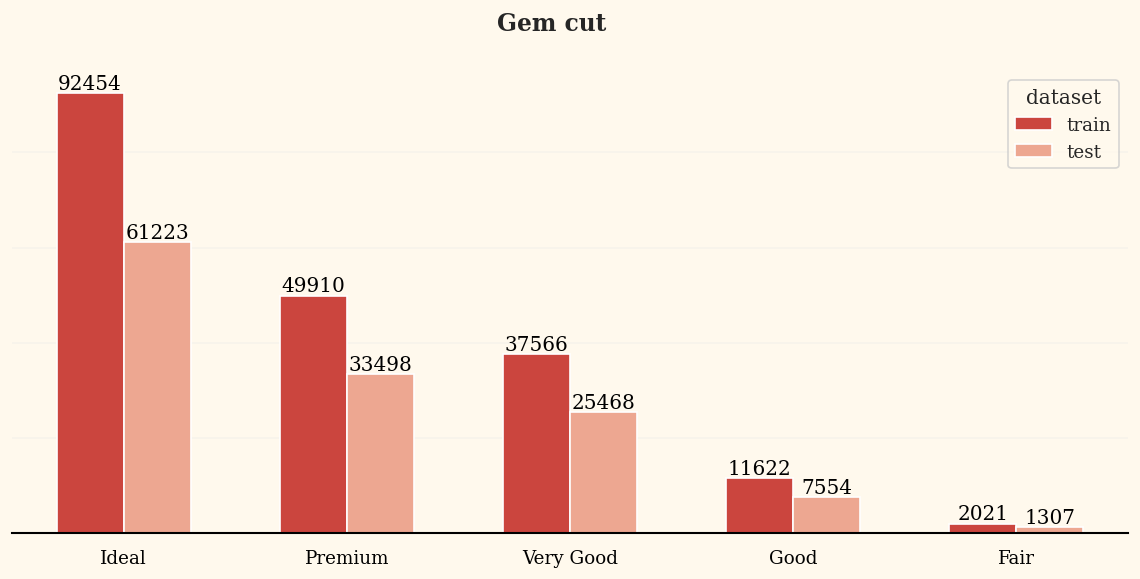

In [21]:
# Code snippet for generating the image with either cut quality, color or clarity counts.
# The illustration part was taken fro https://www.1215diamonds.com/blog/diamond-shape-cut-chart/

train['dataset'] = 'train'
test['dataset'] = 'test'
train_test = pd.concat([train, test])

catergory = 'cut'
fig = plt.figure(figsize=(12, 5), dpi=120)
s = sns.countplot(data=train_test, x=catergory, order=train_test[catergory].value_counts().index, hue='dataset', palette='Reds_r', width=0.6)
fig.suptitle(f'Gem {catergory}', ha='center',  fontweight='bold', fontsize=14)
for container in s.containers:
    s.bar_label(container, c='black', size=12);
    s.set_ylabel(''); s.spines['top'].set_visible(False), 
    s.set_xlabel(''); s.spines['right'].set_visible(False),
    s.spines['left'].set_visible(False)
    plt.tick_params(labelleft=False)
    

# train.drop(columns='dataset', inplace=True)
# test.drop(columns='dataset', inplace=True)

<p align="right">
  <img src="https://drive.google.com/uc?export=view&id=1uZm4hBtHjFX3f4OWn5Lr9KwcvFAsBCsi"/>
</p>

<p align="right">
  <img src="https://drive.google.com/uc?export=view&id=1iAEPc8wgj8kZjRe8xaiUC0b-IG0uyuLT"/>
</p>

<p align="right">
  <img src="https://drive.google.com/uc?export=view&id=1KEeknUacuHTCaoZZ8SoPS9EpA2ZjythC"/>
</p>

<p align="right">
  <img src="https://drive.google.com/uc?export=view&id=13WvFC-BlRTk5qnbuNjGKK1Sms4jaYnhm"/>
</p>

**Observations:**

* The majority of cubic zirconia stones in the dataset are less than 1 `carat` in weight.
* The largest cubic zirconia stone in the dataset has a weight of 5 `carats`.
* Most of the cubic zirconia stones in the dataset are colorless.
* Ideal and premium `cut` cubic zirconia stones are prevalent in the dataset.
* There are no flawless cubic zirconia stones in the dataset.
* The largest groups of cubic zirconia stones in the dataset have `clarity` grades of SI1, VS1, and VS2. It means that the dataset stones are mostly of a good quality.

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
 Crosstabs</p>


In [22]:
pd.crosstab(train.color, train.clarity).style.background_gradient(cmap='YlOrRd')

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
color,,,,,,,,
D,60,41,8543,5043,2308,6522,384,1385
E,104,293,10435,6107,4597,9732,1739,2862
F,100,813,9385,5588,4924,8480,2041,2927
G,82,1884,8632,5119,9118,10784,3481,5291
H,93,760,9449,5149,4957,6673,1876,1842
I,49,347,5139,2389,3378,4105,925,1182
J,24,81,1689,1089,1387,1731,182,273


In [23]:
pd.crosstab(train.color, train.cut).style.background_gradient(cmap='YlOrRd')

cut,Fair,Good,Ideal,Premium,Very Good
color,,,,,
D,246,1510,12056,5821,4653
E,289,2271,17408,8477,7424
F,434,2255,16115,8633,6821
G,405,2139,23076,11337,7434
H,357,1796,13442,9171,6033
I,186,1118,7982,4557,3671
J,104,533,2375,1914,1530


In [24]:
pd.crosstab(train.cut, train.clarity).style.background_gradient(cmap='YlOrRd')

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,64,6,647,646,181,381,21,75
Good,59,58,4386,2646,1383,2354,256,480
Ideal,146,3327,21283,10491,16520,24081,6993,9613
Premium,179,456,14835,10124,7142,12946,1647,2581
Very Good,64,372,12121,6577,5443,8265,1711,3013


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
 Distributions</p>


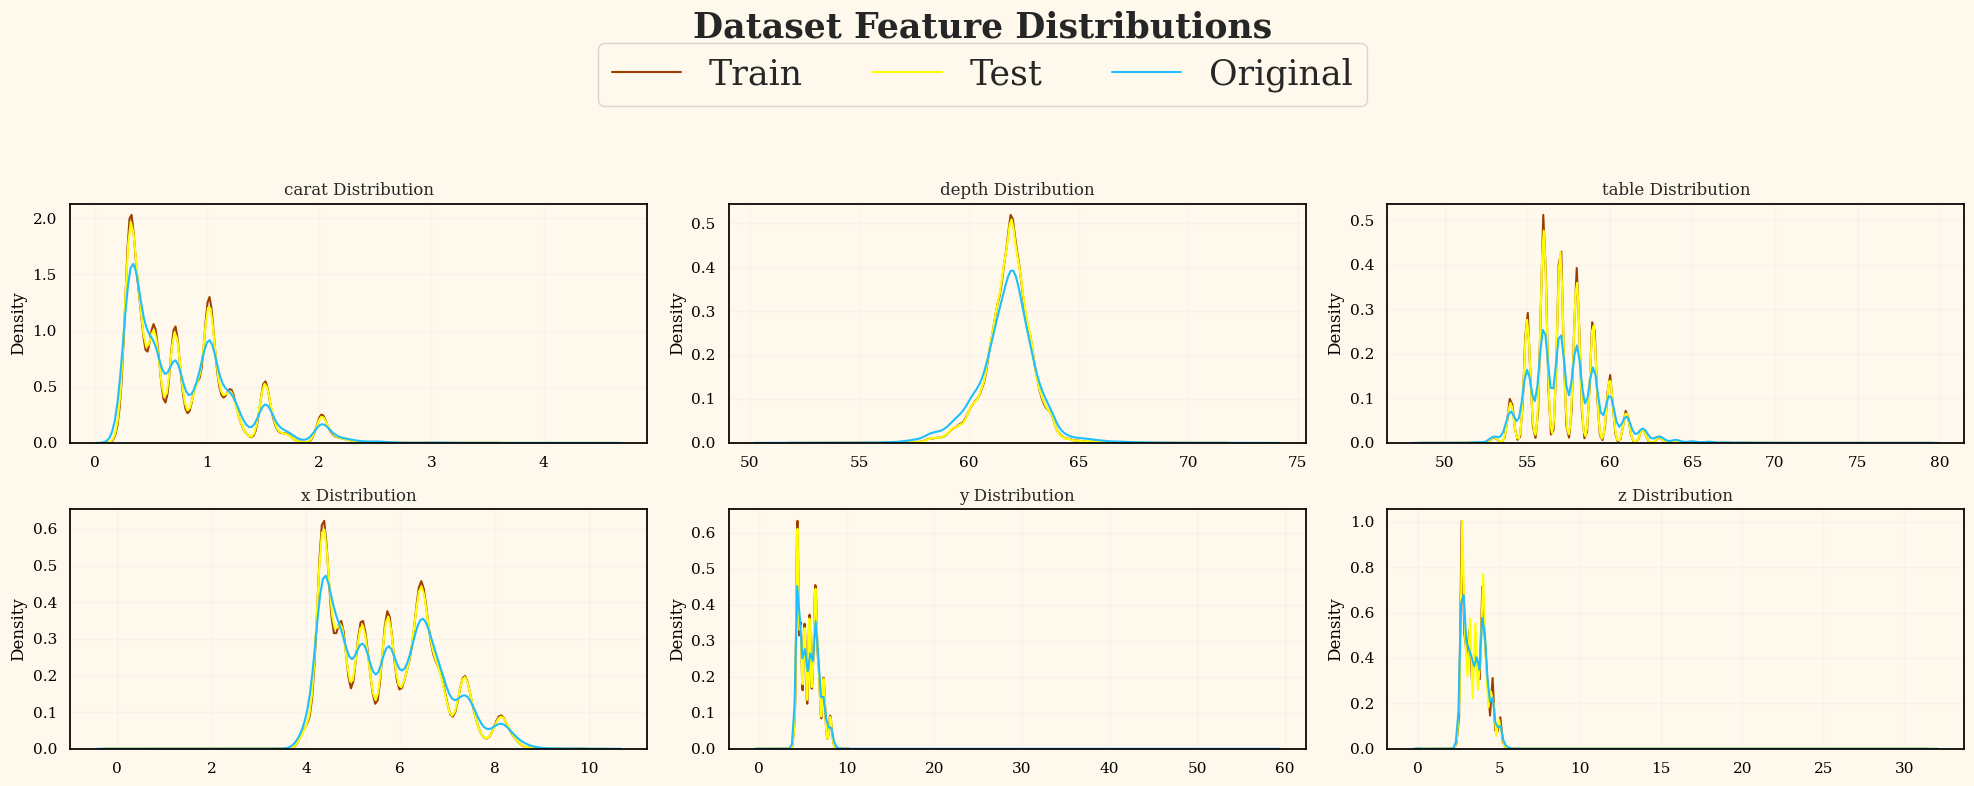

In [25]:
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

columns = features
n_cols = 3
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    sns.kdeplot(
        train[column], label='Train',
        ax=ax[i], color='#9E3F00'
    )
    
    sns.kdeplot(
        test[column], label='Test',
        ax=ax[i], color='yellow'
    )
    
    sns.kdeplot(
        origin[column], label='Original',
        ax=ax[i], color='#20BEFF'
    )
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
    
fig.suptitle(f'Dataset Feature Distributions\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=25, ncol=3)
plt.tight_layout()

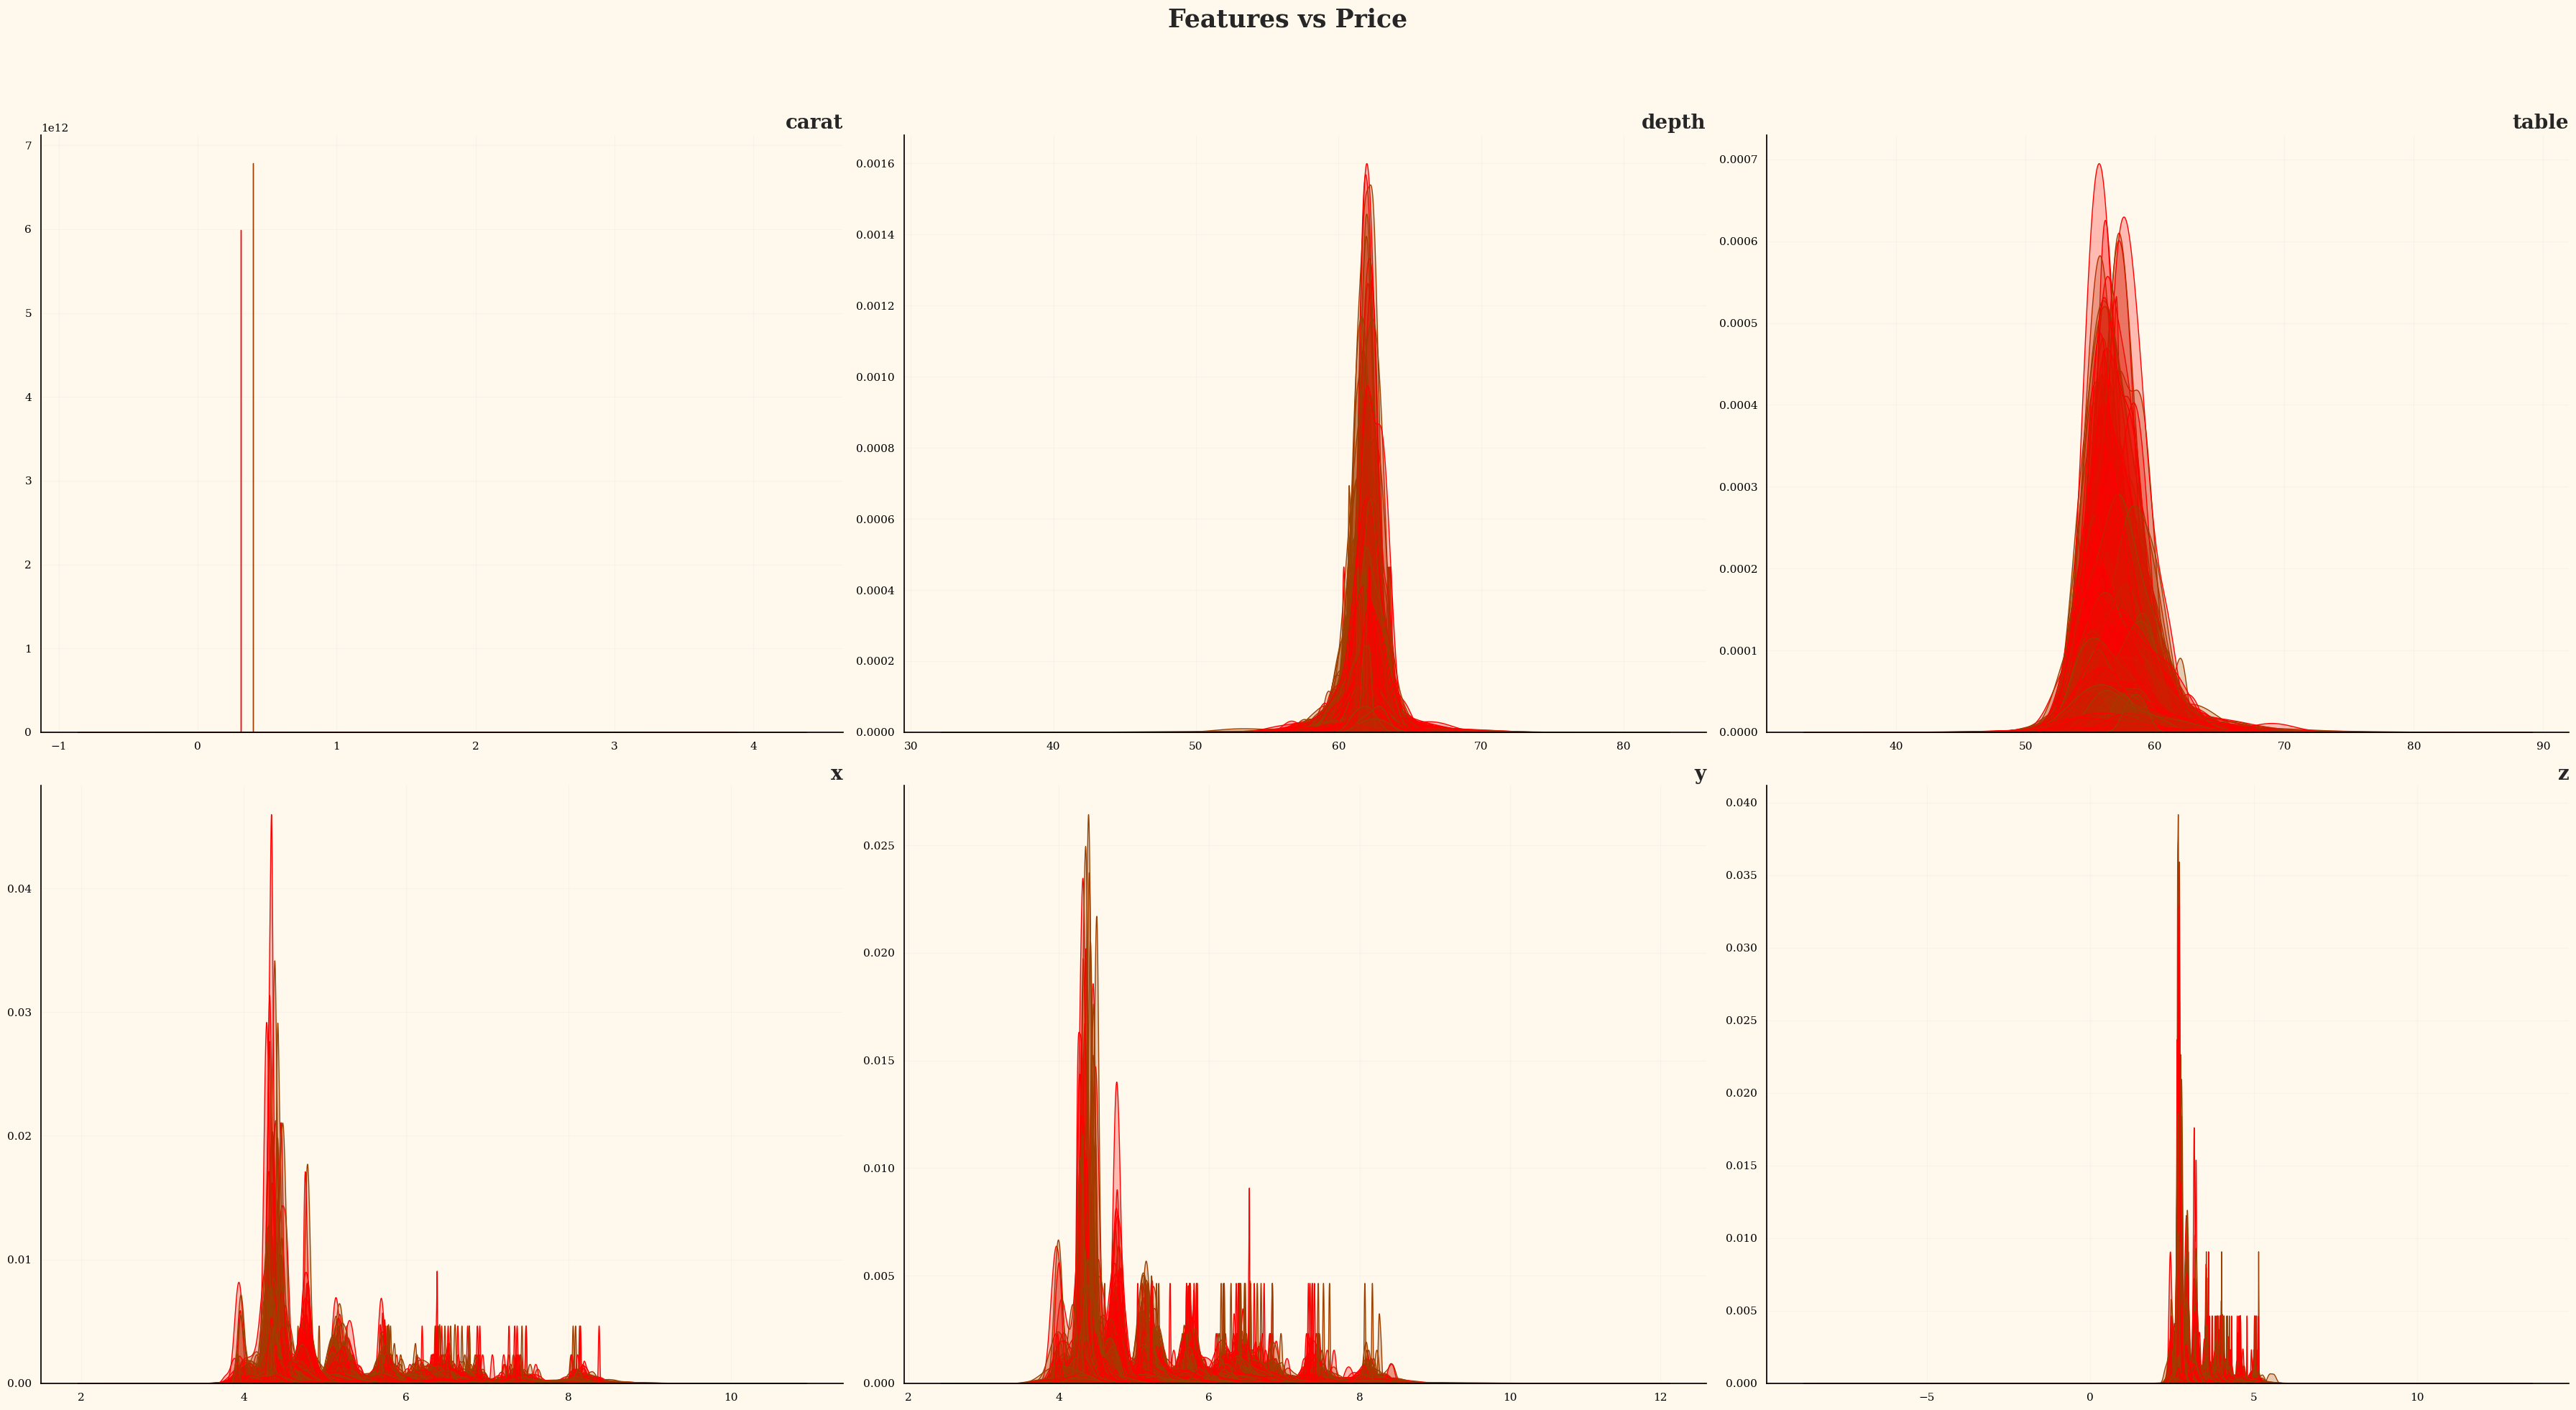

In [26]:
fig = plt.figure(figsize=(6*6, 20), dpi=100)
for idx, col in enumerate(features):
    ax = plt.subplot(2, 3, idx + 1)
    sns.kdeplot(
        data=train.sample(20000), hue='price', fill=True,
        x=col, palette=['#9E3F00', 'red'], legend=False
    )
            
    ax.set_ylabel(''); ax.spines['top'].set_visible(False), 
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right', 
                 weight='bold', fontsize=20)

fig.suptitle(f'Features vs Price\n\n\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

In [27]:
import matplotlib.gridspec as gridspec
class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

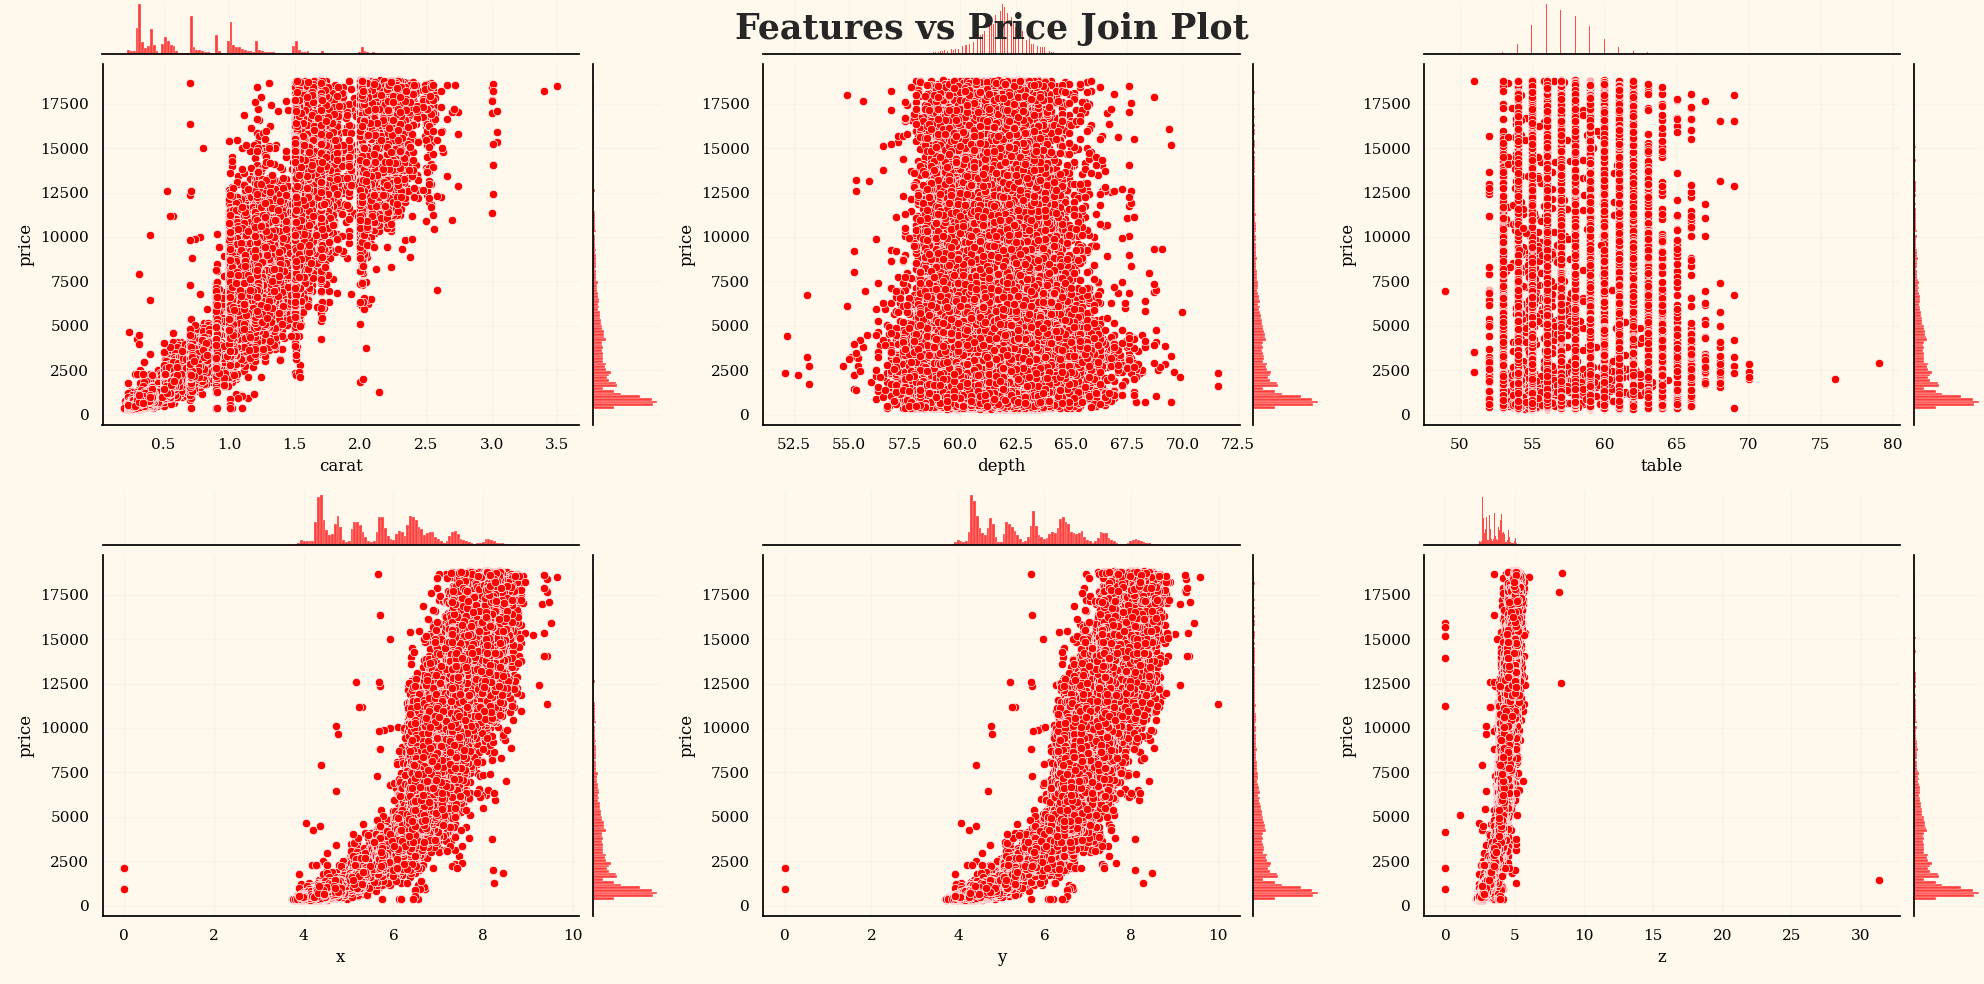

In [28]:
g0 = sns.jointplot(data=train, x='carat', y='price', color='red')
g1 = sns.jointplot(data=train, x='depth', y='price', color='red')
g2 = sns.jointplot(data=train, x='table', y='price', color='red')
g3 = sns.jointplot(data=train, x='x', y='price', color='red')
g4 = sns.jointplot(data=train, x='y', y='price', color='red')
g5 = sns.jointplot(data=train, x='z', y='price', color='red')

fig = plt.figure(figsize=(20, 10), dpi=100)
gs = gridspec.GridSpec(2, 3)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
mg2 = SeabornFig2Grid(g2, fig, gs[2])
mg4 = SeabornFig2Grid(g3, fig, gs[3])
mg5 = SeabornFig2Grid(g4, fig, gs[4])
mg6 = SeabornFig2Grid(g5, fig, gs[5])

gs.tight_layout(fig)
fig.suptitle(f'Features vs Price Join Plot\n\n\n', ha='center',  fontweight='bold', fontsize=25)
plt.show()

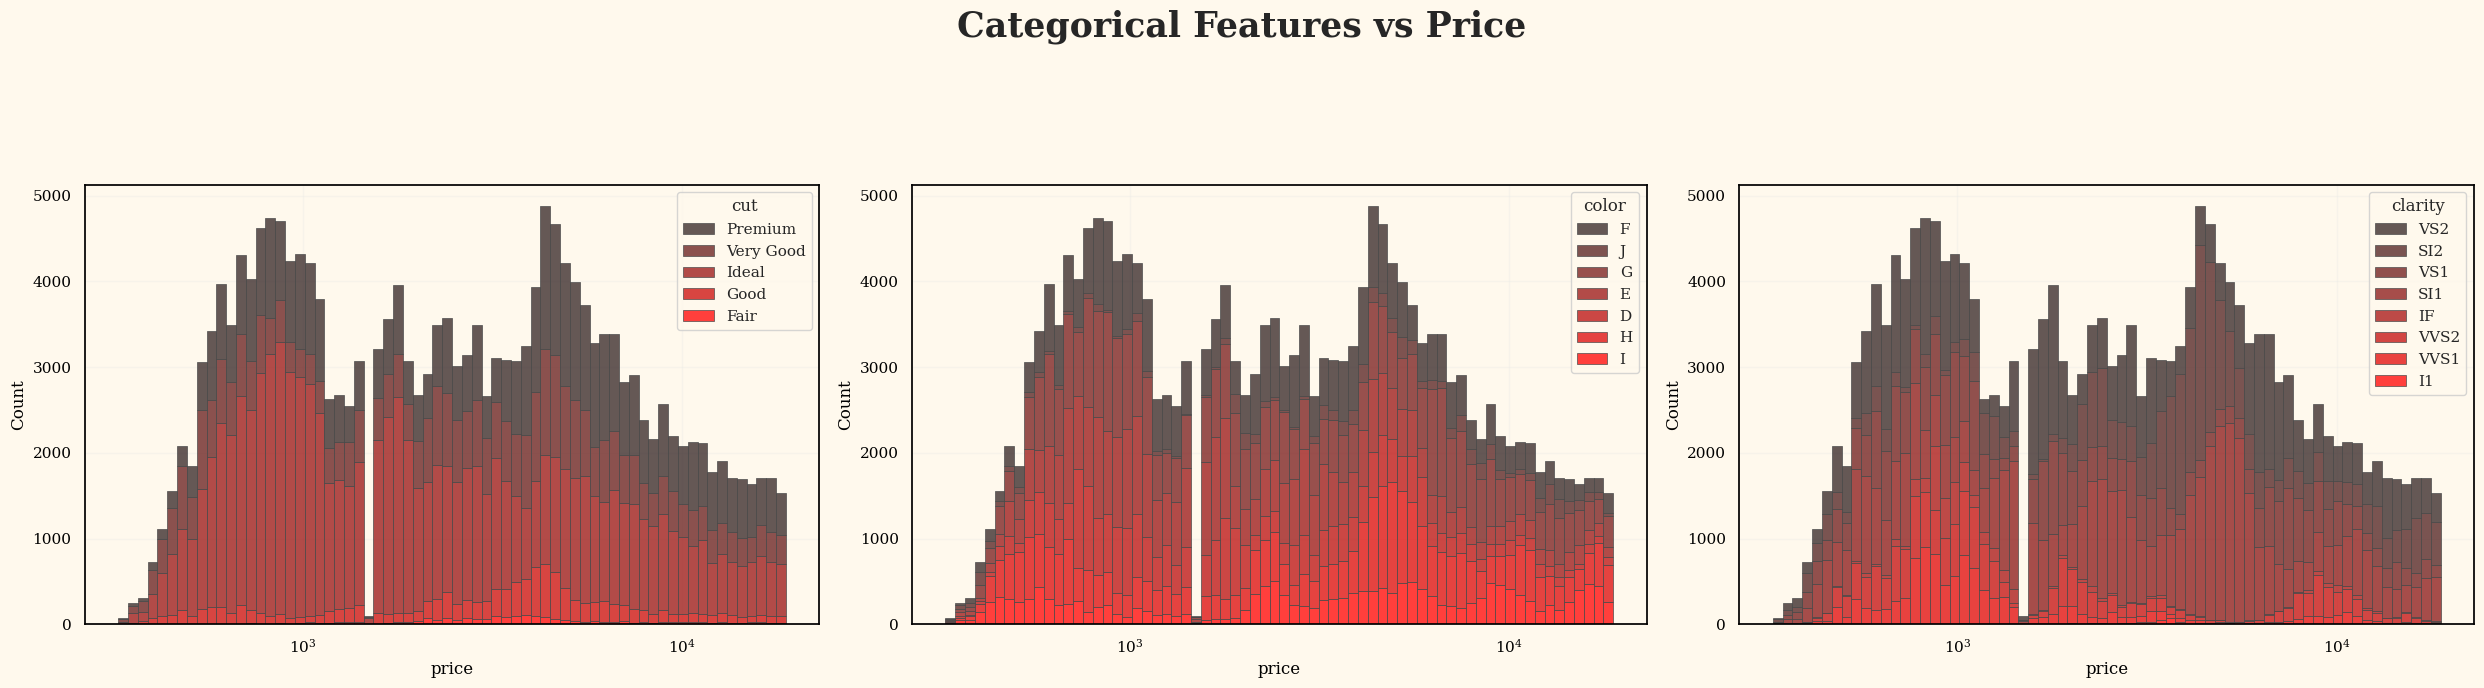

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(25, 7), dpi=100)
ax = ax.flatten()
for i, ft in enumerate(['cut', 'color', 'clarity']):
    sns.histplot(
        data=train,
        x="price", hue=ft,
        multiple="stack",
        palette="dark:red",
        edgecolor=".3",
        linewidth=.5,
        log_scale=True,
        ax=ax[i]
    )
fig.suptitle(f'Categorical Features vs Price\n\n\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

**Observations:**
* The distribution of the original dataset closely follows the synthetic one with minor deviations (although the reader might have a different oppinion).
* The stacked charts supports the 4Cs concept of diamond evaluation, with the most valuable stones exhibiting the best clarity, largest weight, colorless composition, and ideal cut.

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
 Correlations</p>

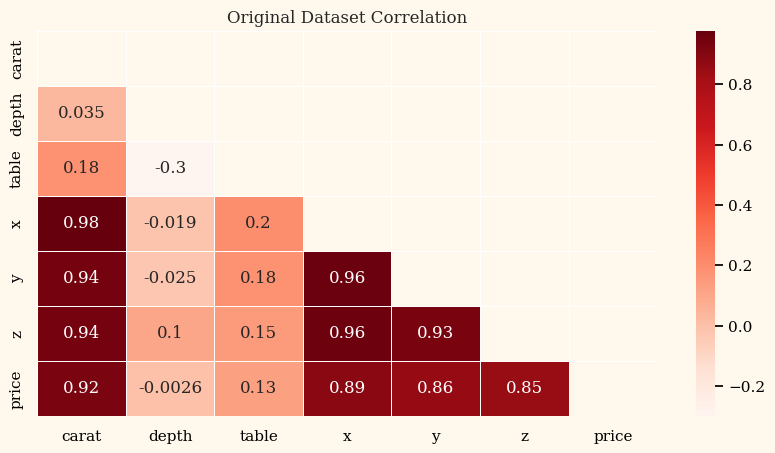

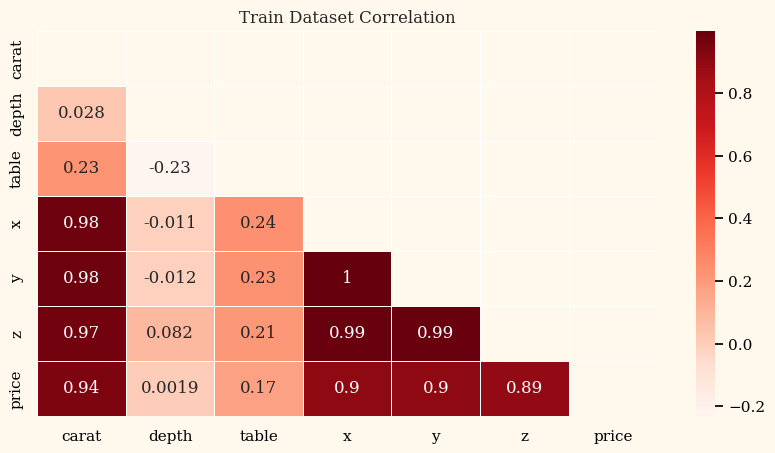

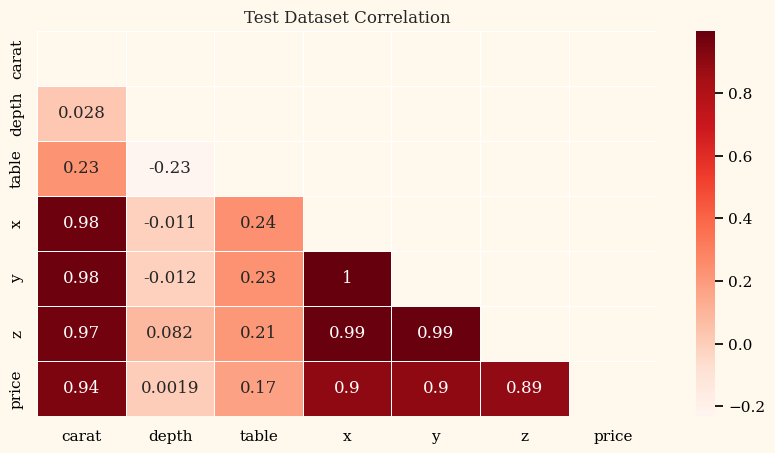

In [30]:
def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str='Train correlation') -> None:
    """Draws the correlation heatmap plot.
    
    Args:
        df: train or test dataframes
        title_name: 'Train' or 'Test' (default 'Train correlation')
        
    Returns:
        subplots of size (len(col_list), 2)
    """

    corr = df.corr()
    fig, axes = plt.subplots(figsize=(10, 5))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='Reds', annot=True)
    plt.title(title_name)
    plt.show()

plot_correlation_heatmap(origin, 'Original Dataset Correlation')
plot_correlation_heatmap(train, 'Train Dataset Correlation')
plot_correlation_heatmap(train, 'Test Dataset Correlation')

**Comment**:

The correlation plots do not indicate any spectacular findings. The dimensions of a diamond (i.e., x, y, and z) show a strong correlation with its price and carat weight. As the dimensions of a diamond increase, so does its volume, which in turn affects its mass, as mass is equal to volume multiplied by density.

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
 Basic Feature Engineering</p>

In [31]:
%%time
#############################################################################################
# CFG
#############################################################################################
origin = pd.read_csv(PATH_ORIGIN).drop(columns='Unnamed: 0')
train = pd.read_csv(PATH_TRAIN).drop(columns='id')
test = pd.read_csv(PATH_TEST).drop(columns='id')
COMBINE = False

if COMBINE:
    train = pd.concat([train, origin]).reset_index(drop=True).dropna()
    
class GemDataProcessor:
    def __init__(self, train_data, test_data):
        self.train_data = train_data
        self.test_data = test_data
        self.enc = OrdinalEncoder()
        self.cats = ['cut', 'color', 'clarity']
    
    @staticmethod
    def fe(df):
        df['volume'] = df['x'] * df['y'] * df['z']
        df['density'] = df['carat'] / (df['volume'] + 1e-6)
        df['depth_per_volume'] = df['depth'] / (df['volume'] + 1e-6)
        df['depth_per_density'] = df['depth'] / (df['density'] + 1e-6)
        df['depth_per_table'] = df['depth'] / (df['table'] + 1e-6)
        return df

    def process_data(self):
        self.train_data = self.fe(self.train_data)
        self.test_data = self.fe(self.test_data)
        
        
        self.train_data[self.cats] = self.enc.fit_transform(self.train_data[self.cats])
        self.test_data[self.cats] = self.enc.transform(self.test_data[self.cats])
        return self.train_data, self.test_data
    
f_e = GemDataProcessor(train, test)
train, test = f_e.process_data()        
print(f'{gld}[INFO] Shapes after Feature Engineering Phase:'
      f'{gld}\n[+] train -> {red}{train.shape}'
      f'{gld}\n[+] test -> {red}{test.shape}\n')

[INFO] Shapes after Feature Engineering Phase:
[+] train -> (193573, 15)
[+] test -> (129050, 14)

CPU times: user 487 ms, sys: 39 ms, total: 526 ms
Wall time: 537 ms


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
 Base XGB Model</p>

In [32]:
def f_importance_plot(f_imp: pd.DataFrame, suffix: str):
    fig = plt.figure(figsize=(12, 0.20*len(f_imp)))
    plt.title(f'Feature importances {suffix}', size=16, y=1.05, 
              fontweight='bold', color='#444444')
    a = sns.barplot(data=f_imp, x='avg_imp', y='feature', 
                    palette='Reds_r', linestyle="-", 
                    linewidth=0.5, edgecolor="black")
    plt.xlabel('')
    plt.xticks([])
    plt.ylabel('')
    plt.yticks(size=11, color='#444444')
    
    for j in ['right', 'top', 'bottom']:
        a.spines[j].set_visible(False)
    for j in ['left']:
        a.spines[j].set_linewidth(0.5)
    plt.tight_layout()
    plt.show()
    
def get_mean_rmse(oof: np.array):
    """oof: ['val_idx', 'preds', 'target']"""
    oof = pd.DataFrame(np.concatenate(oof), columns=['id', 'preds', 'target']).set_index('id')
    oof.index = oof.index.astype(int)
    mean_val_rmse = mean_squared_error(oof.target, oof.preds, squared=False)
    return mean_val_rmse

In [33]:
%%time
config = {
        'SEED': 42,
        'FOLDS': 5,
        'N_ESTIMATORS': 4000,
        'COL_DROP': [
        ]
    }

xgb_params = {
        'max_depth': 4,
        'learning_rate': 0.2,
        # 'random_state': 42,
        'colsample_bytree': 0.67,
        'n_jobs': -1,
        'objective': 'reg:squarederror',
        'early_stopping_rounds': 300,
        'verbosity': 0,
        'eval_metric': 'rmse'
    }

X, y = train.drop(columns=['price']), train.price


cv = model_selection.KFold(n_splits=config['FOLDS'], shuffle=True, random_state=config['SEED'])
feature_importances_ = pd.DataFrame(index=test.columns)
eval_results_ = {}
models_ = []
oof = []

for fold, (fit_idx, val_idx) in enumerate(cv.split(X, y)):
    if (fold + 1) % 5 == 0 or (fold + 1) == 1:
        print(f'{"#" * 24} Training FOLD {fold + 1} {"#" * 24}')

    # Split the dataset according to the fold indexes.
    X_fit = X.iloc[fit_idx]
    X_val = X.iloc[val_idx]
    y_fit = y.iloc[fit_idx]
    y_val = y.iloc[val_idx]

    # XGB .train() requires xgboost.DMatrix.
    fit_set = xgb.DMatrix(X_fit, y_fit)
    val_set = xgb.DMatrix(X_val, y_val)
    watchlist = [(fit_set, 'fit'), (val_set, 'val')]

    # Training.

    eval_results_[fold] = {}
    model = xgb.train(
        num_boost_round=config['N_ESTIMATORS'],
        params=xgb_params,
        dtrain=fit_set,
        evals=watchlist,
        evals_result=eval_results_[fold],
        verbose_eval=False,
        callbacks=[
            EarlyStopping(xgb_params['early_stopping_rounds'],
                          data_name='val', save_best=True)],
    )

    val_preds = model.predict(val_set)
    val_score = mean_squared_error(y_val, val_preds, squared=False)
    best_iter = model.best_iteration

    idx_pred_target = np.vstack([val_idx, val_preds, y_val]).T  # shape(len(val_idx), 3)
    print(f'{" " * 20} RMSE:{blu}{val_score:.5f}{res} {" " * 6} best iteration  :{blu}{best_iter}{res}')

    oof.append(idx_pred_target)

    # Stores the feature importances
    feature_importances_[f'gain_{fold}'] = model.get_score(importance_type='gain').values()
    feature_importances_[f'split_{fold}'] = model.get_score(importance_type='weight').values()

    # Stores the model
    models_.append(model)

mean_val_rmse = get_mean_rmse(oof)
print(f'{"*" * 45}\n{red}Mean{res} RMSE: {red}{mean_val_rmse:.5f}')

######################## Training FOLD 1 ########################
                     RMSE:588.50407        best iteration  :224
                     RMSE:586.15052        best iteration  :242
                     RMSE:583.00763        best iteration  :213
                     RMSE:580.96455        best iteration  :292
######################## Training FOLD 5 ########################
                     RMSE:603.15990        best iteration  :297
*********************************************
Mean RMSE: 588.40952
CPU times: user 8min 24s, sys: 1.42 s, total: 8min 25s
Wall time: 4min 29s


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
 Feature importances and OOF errors</p>

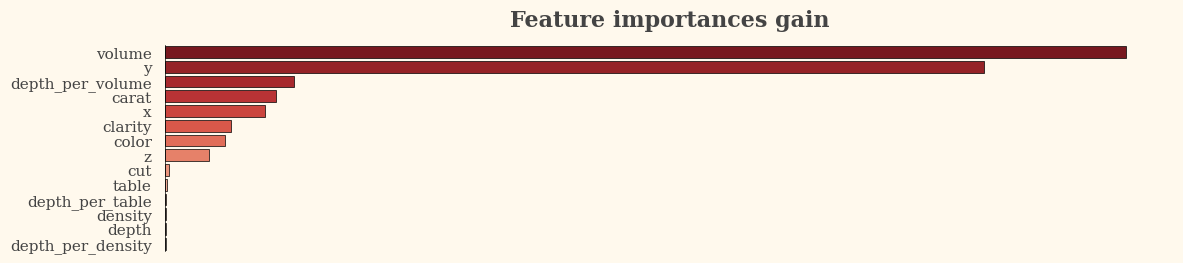

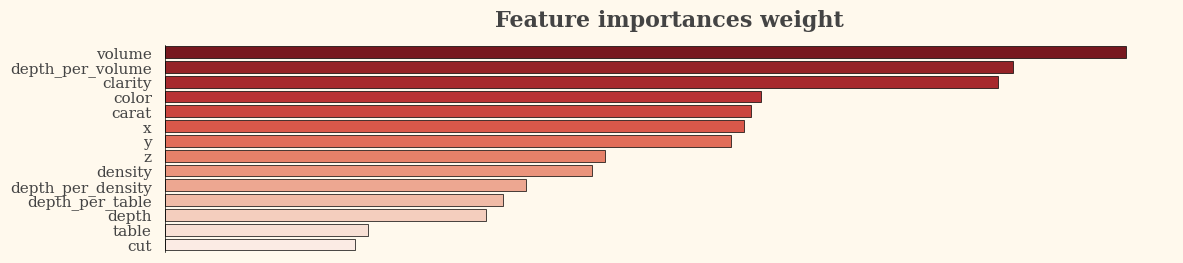

In [34]:
f_imp_gain = feature_importances_[[col for col in feature_importances_.columns if col.startswith('gain')]].mean(axis=1)
f_imp_split = feature_importances_[[col for col in feature_importances_.columns if col.startswith('split')]].mean(axis=1)
f_imp_gain = f_imp_gain.reset_index().sort_values(by=0, ascending=False)
f_imp_gain.columns = ['feature', 'avg_imp']
f_imp_split = f_imp_split.reset_index().sort_values(by=0, ascending=False)
f_imp_split.columns = ['feature', 'avg_imp']
f_importance_plot(f_imp_gain, 'gain')
f_importance_plot(f_imp_split, 'weight')

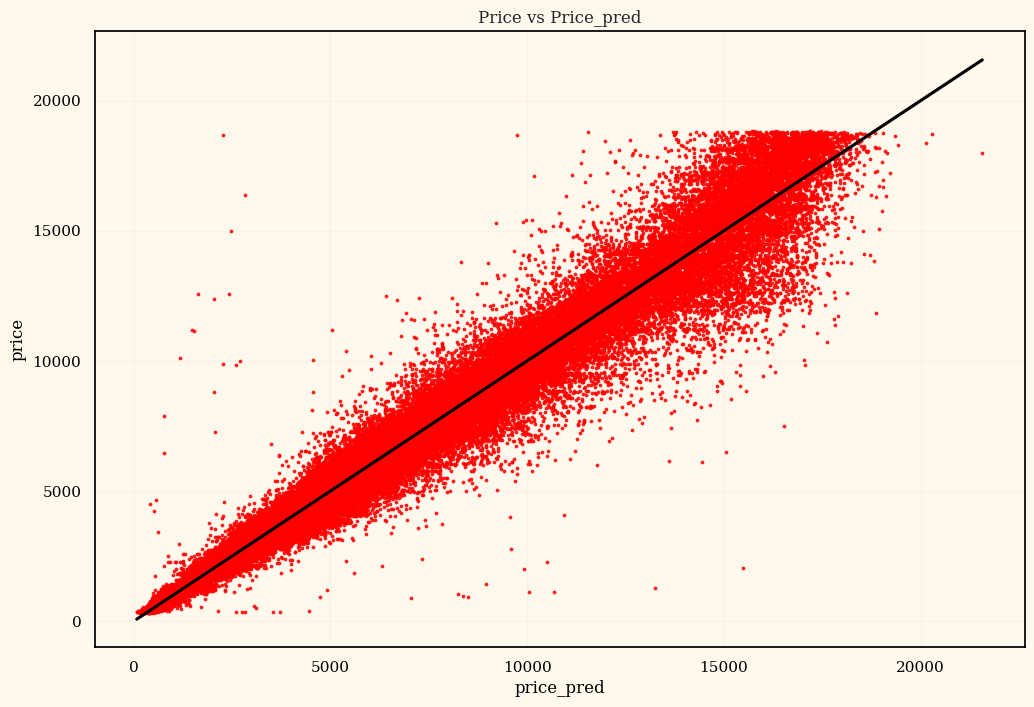

In [35]:
oof_df = pd.DataFrame(np.concatenate(oof), columns=['index', 'price_pred', 'price'])
fig = plt.figure(figsize=(12, 8), dpi=100)
sns.regplot(data=oof_df, x='price_pred', y='price', color='red',
            scatter=True, line_kws={"color": "black"}, scatter_kws={'s': 3})
plt.title('Price vs Price_pred');

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
 Submission</p>

In [36]:
def predict(X):
    y = np.zeros(len(X))
    for model in tqdm(models_):
        y += model.predict(xgb.DMatrix(X))
    return y / len(models_)

predictions = predict(test)
sub = pd.read_csv(PATH_SUB)
sub.price = predictions
sub.to_csv('first_submission', index=False)
sub.head(3)

  0%|          | 0/5 [00:00<?, ?it/s]

,id,price
0,193573,852.17
1,193574,2511.46
2,193575,2332.26


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
 Single Best XGB</p>

In [38]:
best_sub = pd.read_csv('/kaggle/working/first_submission')
best_sub.to_csv('best_xgb_13.csv', index=False)
best_sub.head(3)

,id,price
0,193573,852.17
1,193574,2511.46
2,193575,2332.26


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
 Thank you!</p>
